In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

# Load dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("nyc_climate.csv")  # Adjust path if needed
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

Saving nyc_climate.csv to nyc_climate (3).csv


In [93]:
# Select features for clustering
features = ['TAVG', 'TMAX', 'TMIN']
df_clustering = df[features].dropna()  # Remove missing values

# Standardize the data (Hierarchical Clustering is sensitive to scale)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)

# Perform Hierarchical Clustering
linkage_matrix = linkage(df_scaled, method='ward')  # Ward's method minimizes variance

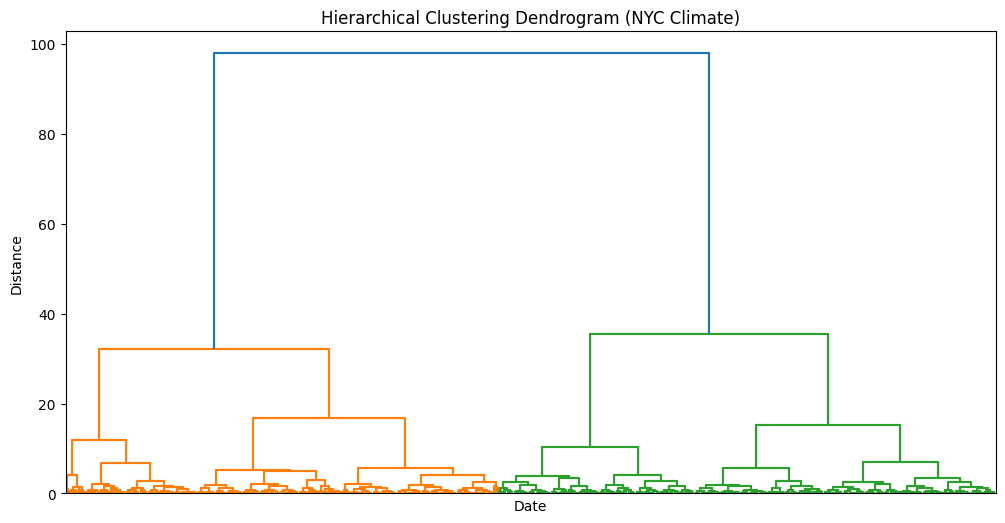

In [94]:
# Plot Dendrogram
num_clusters_threshold = 70
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=df_clustering.index.strftime('%Y-%m-%d'), leaf_rotation=90, leaf_font_size=8, color_threshold=num_clusters_threshold)
plt.title("Hierarchical Clustering Dendrogram (NYC Climate)")
plt.xlabel("Date")
plt.ylabel("Distance")
dendrogram(linkage_matrix, no_labels=True)
plt.show()

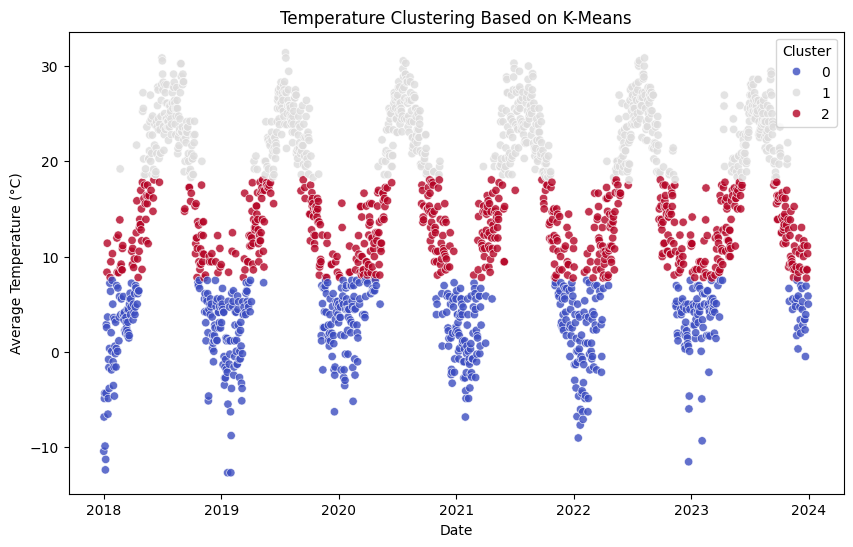

In [97]:
# Assign clusters based on distance threshold
num_clusters = 3  # Could be changed
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
df_clustering['Cluster_KMeans'] = kmeans.fit_predict(df_scaled)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_clustering.index, y=df_clustering['TAVG'], hue=df_clustering['Cluster_KMeans'], palette="coolwarm", alpha=0.8)
plt.title("Temperature Clustering Based on K-Means")
plt.xlabel("Date")
plt.ylabel("Average Temperature (°C)")
plt.legend(title="Cluster")
plt.show()

In [98]:
# from sklearn.metrics import silhouette_score
# sil_score = silhouette_score(df_scaled, df_clustering['Cluster'])
# print(f"Silhouette Score: {sil_score:.3f}")
sil_score_kmeans = silhouette_score(df_scaled, df_clustering['Cluster_KMeans'])
print(f"Silhouette Score (K-Means): {sil_score_kmeans:.3f}")

Silhouette Score (K-Means): 0.544


In [99]:
cluster_means_kmeans = df_clustering.groupby('Cluster_KMeans')['TAVG'].mean()
print(cluster_means_kmeans)
cluster_means_kmeans = df_clustering.groupby('Cluster_KMeans')['TAVG'].mean()
print(cluster_means_kmeans)


Cluster_KMeans
0     2.558576
1    23.576032
2    12.642787
Name: TAVG, dtype: float64
Cluster_KMeans
0     2.558576
1    23.576032
2    12.642787
Name: TAVG, dtype: float64
